In [1]:
from rdfpandas.graph import to_graph
import pandas as pd
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from rdflib import Graph

In [2]:
def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    out = dg.create_png()
    with open("outputs/output.png", "wb") as png:
        png.write(out)
    display(Image(out))


In [3]:
df = pd.read_csv('outputs/complete_df.csv', keep_default_na = False)
# df = pd.read_csv('testdf.csv', index_col = "iso_code", keep_default_na = False)
df.drop(["Unnamed: 0"], axis=1, inplace = True)
# df.rename(columns = {"iso_code": "http://publications.europa.eu/ontology/authority/op-code{URIREF}"}, inplace=true)

In [4]:
df2 = pd.read_csv("http://api.geonames.org/countryInfoCSV?username=leftkal", sep="\t") #get geonameId

In [5]:
columns_to_drop = ["iso alpha2", "iso numeric", "fips code","name","capital","areaInSqKm","population","languages","currency"]
df2.drop(columns_to_drop, axis=1, inplace=True)
df2.rename(columns = {"iso alpha3": "iso_code"}, inplace=True)

In [6]:
df3 = pd.merge(df, df2, on = "iso_code")

In [7]:
df3["geonameId"] = df3["geonameId"].apply(lambda x: "https://sws.geonames.org/" + str(x) + "/") 
df3.set_index(["geonameId"], inplace=True)

columns_renamed = {}
for col in df3.columns:
    columns_renamed[col] = "http://my.uri/ontology/" + col
df3.rename(columns = columns_renamed, inplace=True)

In [8]:
g = to_graph(df3)

for geonameId in df3.index.to_list():
    g.parse(geonameId + "about.rdf", format="xml")

# qres = g.query(
#     PREFIX xsd:  <http://www.w3.org/2001/XMLSchema#>
#     """SELECT ?b ?c
#        WHERE {
#           <""" + geonameId + """> ?b ?c .
#        }""")

# for row in qres:
#     print(row)

In [9]:
qres = g.query(
    """
    PREFIX xsd:  <http://www.w3.org/2001/XMLSchema#>
    PREFIX geo:  <http://www.geonames.org/ontology#>
    PREFIX my:   <http://my.uri/ontology/>
    SELECT ?a ?b ?c
       WHERE {
          ?a my:religiousity ?c ;
           geo:name "Turkey" ;
           geo:alternateName ?b .
          filter(?c > 71)
          filter(datatype(?c) = xsd:integer)
          filter(lang(?b) = "el")
       }""")

for row in qres:
    print(row)

(rdflib.term.URIRef('https://sws.geonames.org/298795/'), rdflib.term.Literal('Τουρκία', lang='el'), rdflib.term.Literal('79', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#integer')))


In [10]:
qres = g.query(
    """
    PREFIX xsd:  <http://www.w3.org/2001/XMLSchema#>
    PREFIX geo:  <http://www.geonames.org/ontology#>
    PREFIX my:   <http://my.uri/ontology/>
    SELECT ?a ?b ?c
       WHERE {
          ?_ geo:name "Armenia" ; 
           geo:parentFeature ?b .
          ?c geo:parentFeature ?b .
          ?c geo:alternateName ?a .
          filter(lang(?a) = "el")
       }""")

for row in qres:
    print(row)

(rdflib.term.Literal('Αρμενία', lang='el'), rdflib.term.URIRef('https://sws.geonames.org/615318/'), rdflib.term.URIRef('https://sws.geonames.org/174982/'))
(rdflib.term.Literal('Γεωργία', lang='el'), rdflib.term.URIRef('https://sws.geonames.org/615318/'), rdflib.term.URIRef('https://sws.geonames.org/614540/'))
(rdflib.term.Literal('Αζερμπαϊτζάν', lang='el'), rdflib.term.URIRef('https://sws.geonames.org/615318/'), rdflib.term.URIRef('https://sws.geonames.org/587116/'))
(rdflib.term.Literal('Αζερμπαϊτζάν', lang='el'), rdflib.term.URIRef('https://sws.geonames.org/11812265/'), rdflib.term.URIRef('https://sws.geonames.org/587116/'))
(rdflib.term.Literal('Καζακστάν', lang='el'), rdflib.term.URIRef('https://sws.geonames.org/11812265/'), rdflib.term.URIRef('https://sws.geonames.org/1522867/'))
(rdflib.term.Literal('Λευκορωσία', lang='el'), rdflib.term.URIRef('https://sws.geonames.org/11812265/'), rdflib.term.URIRef('https://sws.geonames.org/630336/'))
(rdflib.term.Literal('Ρωσία', lang='el'), 

In [11]:
qres = g.query(
    """
    PREFIX xsd:  <http://www.w3.org/2001/XMLSchema#>
    PREFIX geo:  <http://www.geonames.org/ontology#>
    PREFIX my:   <http://my.uri/ontology/>
    SELECT ?a ?b
       WHERE {
          ?c geo:parentFeature <https://sws.geonames.org/7729897/> .
          ?c geo:alternateName ?a .
          ?c my:may_total_vaccinations ?b
          filter(lang(?a) = "el")
       }""")

for row in qres:
    print(row)

(rdflib.term.Literal('Τουρκία', lang='el'), rdflib.term.Literal('28.95751066128066', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.Literal('Αρμενία', lang='el'), rdflib.term.Literal('0.0', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.Literal('Κατάρ', lang='el'), rdflib.term.Literal('59.96194905035296', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.Literal('Ισραήλ', lang='el'), rdflib.term.Literal('120.86358763830273', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.Literal('Γεωργία', lang='el'), rdflib.term.Literal('1.2939449145582596', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.Literal('Λίβανος', lang='el'), rdflib.term.Literal('7.473706652340126', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')))
(rdflib.term.Literal('Αζερμπαϊτζάν', lang='el'), rdflib.term.Litera


(dot.exe:157540): Pango-WARNING **: couldn't load font "DejaVu Sans Bold Not-Rotated 14", falling back to "Sans Bold Not-Rotated 14", expect ugly output.

(dot.exe:157540): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(dot.exe:157540): Pango-WARNING **: couldn't load font "DejaVu Sans Not-Rotated 14", falling back to "Sans Not-Rotated 14", expect ugly output.



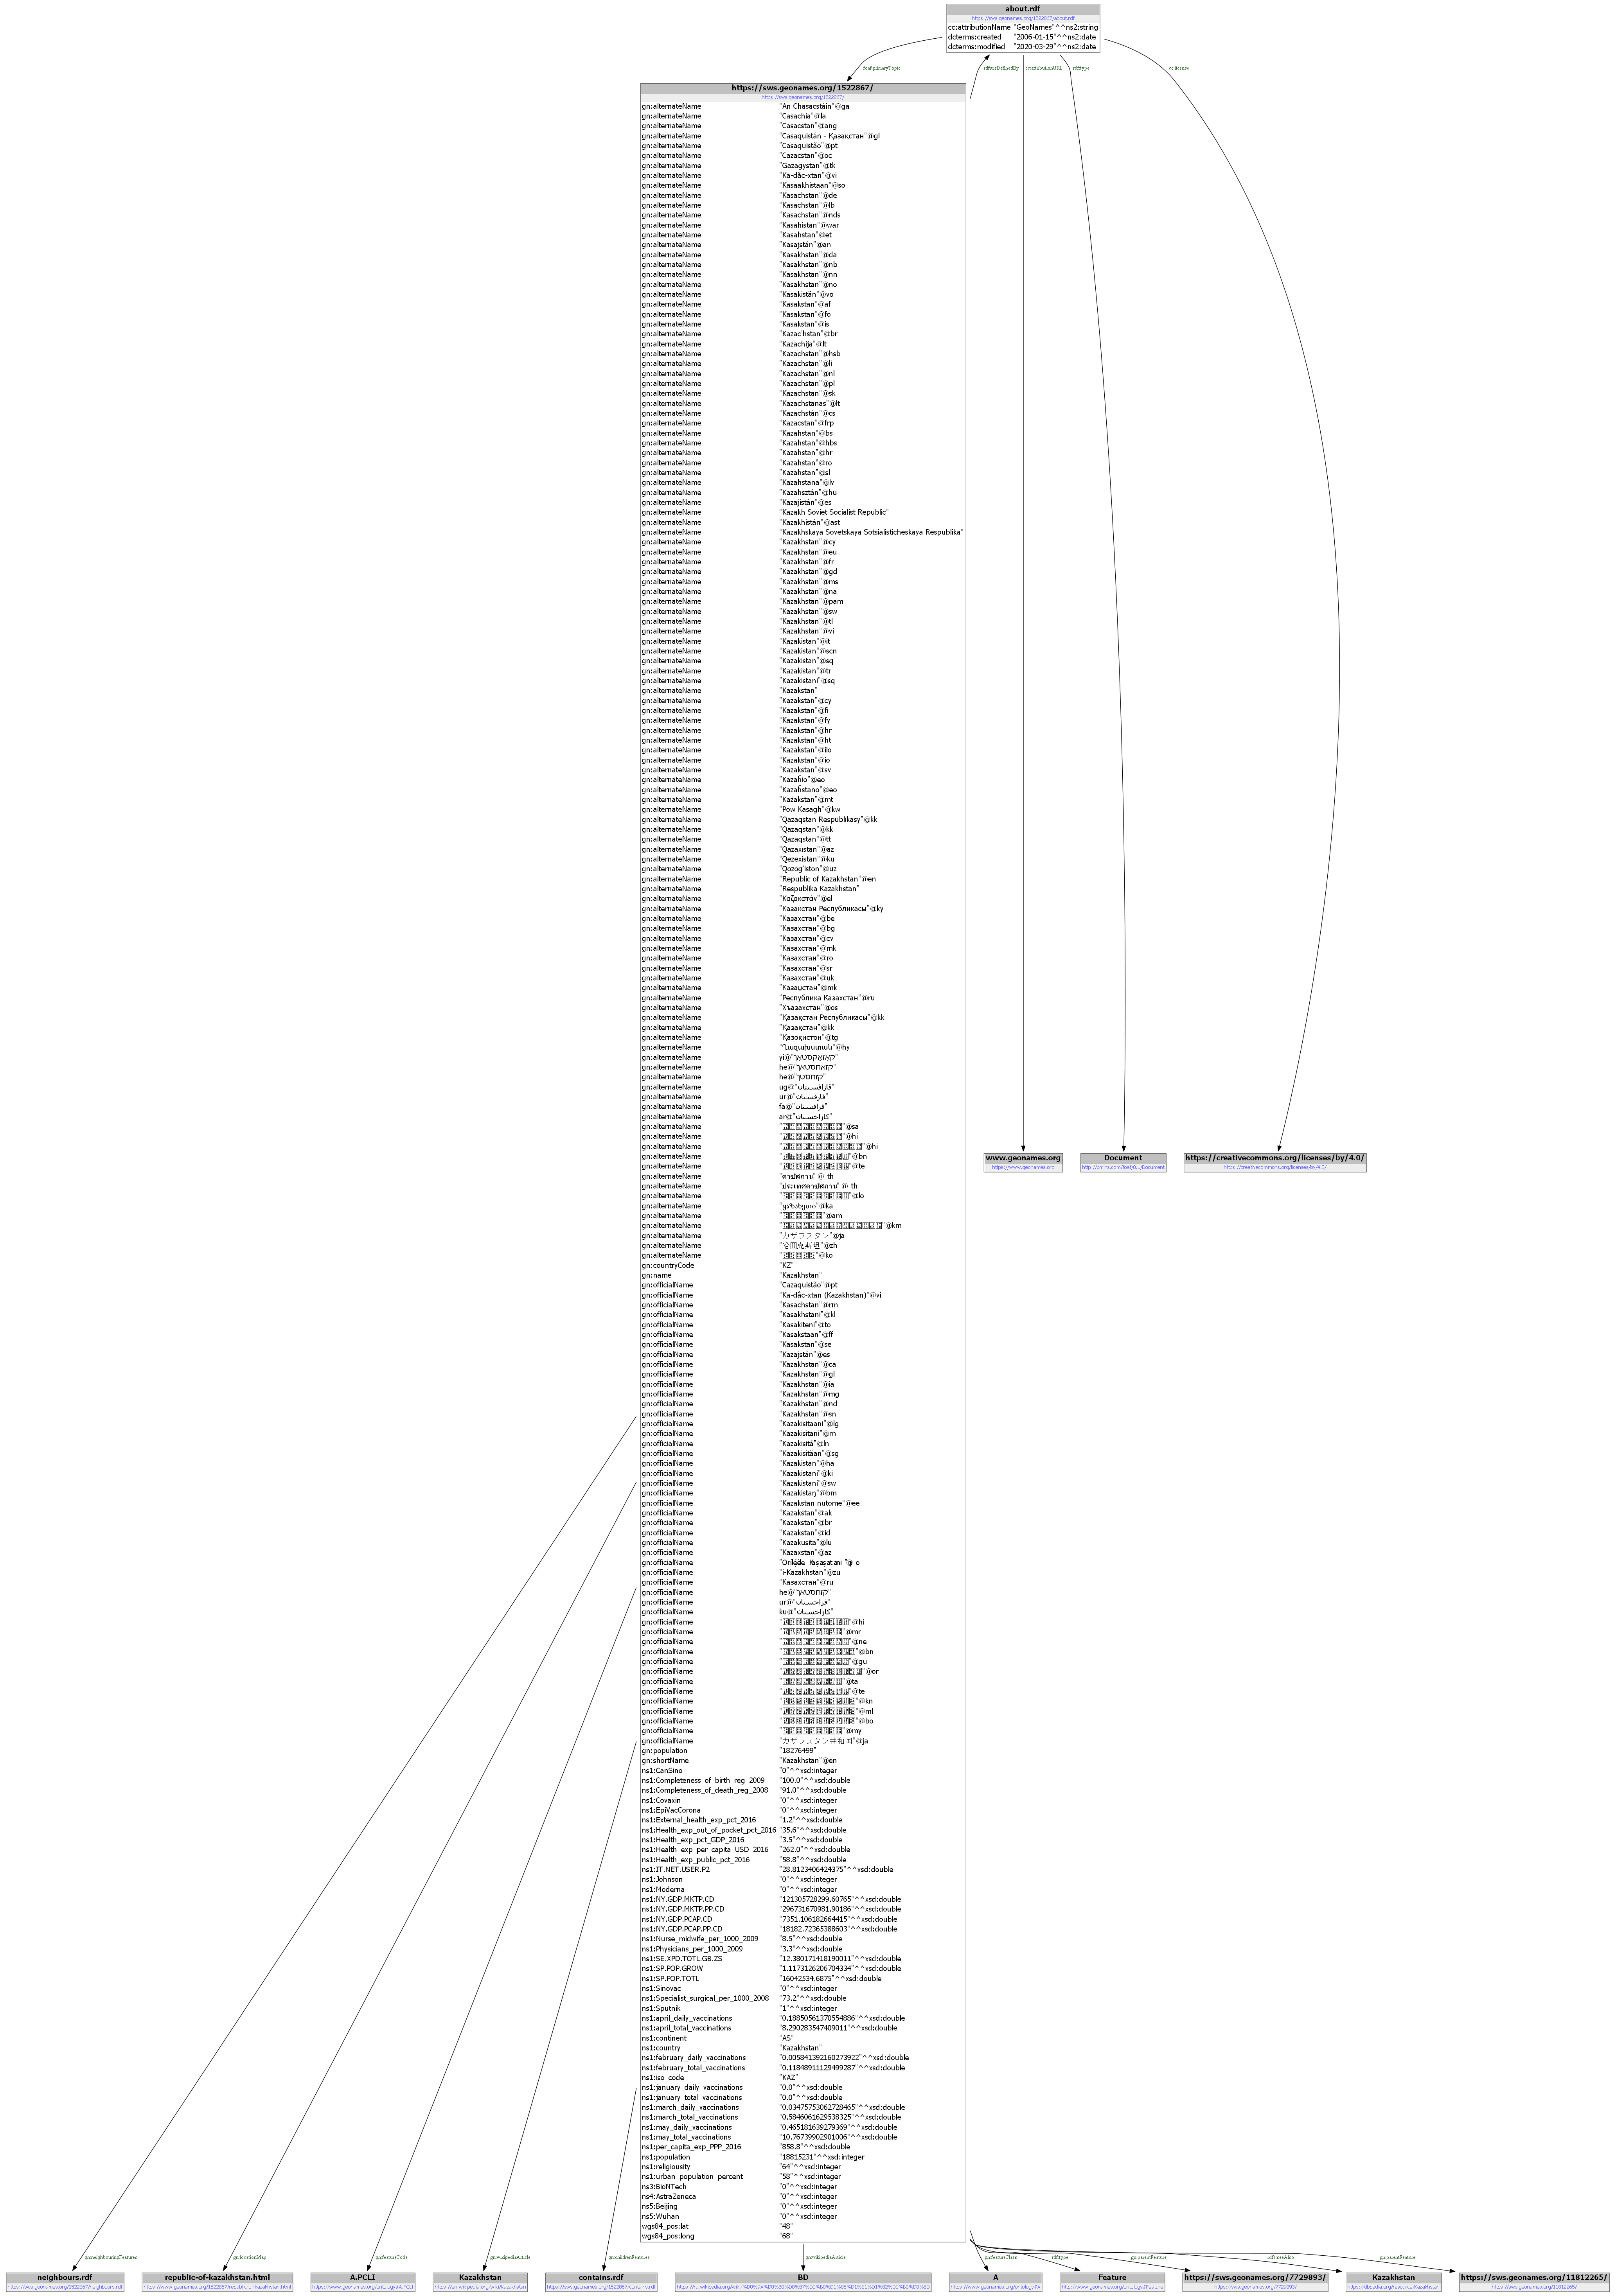

In [12]:
testg = to_graph(df3.loc[df3["http://my.uri/ontology/country"] == "Kazakhstan"])
testg.parse("https://sws.geonames.org/1522867/" + "about.rdf", format="xml")
visualize(testg)

In [13]:
g.serialize(destination='outputs/output.txt', format='turtle')